In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [ ]:
# tables containing translation

condition = pd.DataFrame({"Condition": ["pobre", "promedio", "bueno", "excelente"], 
                         "Translation": ["poor", "average", "okay", "excellent"]})

organic_rec = pd.DataFrame({"Recommendation": ["cal", "ayo y cebolla", "ceniza", "ace", "nim", "hojas de chile", "eucalipto"], 
                         "Translation": ["lime", "garlic and anion", "ash", "ace", "neem tree", "chilli leaves", "eucalyptes"]})

chemical_rec = pd.DataFrame({"Recommendation": ["sipermetrina", "iodam", "triple 15", "urea", "triple 20"], 
                            "Description": ["synthetic pyrethroid used as an insecticide", 
                                           "?",
                                           "contains urea and ammoniacal nitrogen plus sulfur. \
                                           an economical fertilizer.", 
                                           "nitrogenous product, used for fertilizer.", 
                                           "all purpose fertilizer"]})
fruit = pd.DataFrame({"Fruit": ["calala", "papaya", "banano", "granadilla", "tomate", "melon", "sandia", "guayaba", "jamaica", "plátano"], 
                     "Translation": ["passion fruit", "papaya", "banana", "granadilla", "tomato", "melon", "watermelon", "guava", "jamaica", "banana"]})

vegetable = pd.DataFrame({"Vegetable": ["ayote", "camote", "cebolla", "chiltoma", "pepino", "yuca", "rábano", "verengena"], 
                         "Translation": ["squash", "sweet potato", "onion", "chiltoma", "cucumber", "yucca", "radish", "eggplant"]})

legumes_n_seeds = pd.DataFrame({"Legumes_and_Seeds": ["frijol de vara", "pipián", "soya"],
                               "Translation": ["bean", "pipián", "soy"]})
grasses = pd.DataFrame({"Grasses": ["caña de azucar", "maiz"], 
                       "Translation": ["sugar cane", "corn"]})

plague = pd.DataFrame({"Plague": ["mosca blanca", "trip", "afido", "mildiu", "cercospora", "mal del talluelo"], 
                      "Translation": ["whitefly", "trip", "aphid", "mildew", "cercospora", "stem disease"], 
                      "Description": ["Whiteflies and their larvae feed by sucking plant juices out from the underside of leaves, \
                      weakening the plant. When they feed, they also leave behind a sticky substance known as honeydew, \
                      which can attract other pests and encourage mold and fungal diseases","?", 
                                     "Really large colonies of feeding aphids can weaken plant growth, cause leaves to yellow, curl or drop early.", 
                                     "Mildew does stress the plant, and severe or repetitive infections can weaken the plant, \
                                     making it more prone to other diseases and insect damage.", 
                                     "A type of fungi that causes leaf spots.", 
                                     "Stem rot can readily infect crops that are in their vegetative or \
                                     flowering stages. The disease can survive up to five years in the soil."]})

display(condition)
display(organic_rec)
display(chemical_rec)
display(fruit)
display(vegetable)
display(legumes_n_seeds)
display(grasses)
display(plague)

,Condition,Translation
0,pobre,poor
1,promedio,average
2,bueno,okay
3,excelente,excellent


,Recommendation,Translation
0,cal,lime
1,ayo y cebolla,garlic and anion
2,ceniza,ash
3,ace,ace
4,nim,neem tree
5,hojas de chile,chilli leaves
6,eucalipto,eucalyptes


,Recommendation,Description
0,sipermetrina,synthetic pyrethroid used as an insecticide
1,iodam,?
2,triple 15,contains urea and ammoniacal nitrogen plus sul...
3,urea,"nitrogenous product, used for fertilizer."
4,triple 20,all purpose fertilizer


,Fruit,Translation
0,calala,passion fruit
1,papaya,papaya
2,banano,banana
3,granadilla,granadilla
4,tomate,tomato
5,melon,melon
6,sandia,watermelon
7,guayaba,guava
8,jamaica,jamaica
9,plátano,banana


,Vegetable,Translation
0,ayote,squash
1,camote,sweet potato
2,cebolla,onion
3,chiltoma,chiltoma
4,pepino,cucumber
5,yuca,yucca
6,rábano,radish
7,verengena,eggplant


,Legumes_and_Seeds,Translation
0,frijol de vara,bean
1,pipián,pipián
2,soya,soy


,Grasses,Translation
0,caña de azucar,sugar cane
1,maiz,corn


,Plague,Translation,Description
0,mosca blanca,whitefly,Whiteflies and their larvae feed by sucking pl...
1,trip,trip,?
2,afido,aphid,Really large colonies of feeding aphids can we...
3,mildiu,mildew,"Mildew does stress the plant, and severe or re..."
4,cercospora,cercospora,A type of fungi that causes leaf spots.
5,mal del talluelo,stem disease,Stem rot can readily infect crops that are in ...


In [2]:
# dropped last three rows (just empty)
correct_names = pd.read_excel("210304_Full Participant List Farming Program 2017-2021.xlsx").drop([51,52,53], axis=0)
correct_names.columns = correct_names.loc[0,:]
correct_names = correct_names.drop([0], axis=0)

# load data
data_17_19 = pd.read_excel("VL Huertos Familiares- Hoja de Datos (2017-2019).xlsx")
data_19_20 = pd.read_excel("VL Huertos Familiares- Hoja de Datos (2019-2020).xlsx")

# drop empty column
data_17_19 = data_17_19.drop("Unnamed: 10", axis=1)

translated_cols = ['Date visited','Auditor','Region','Community','Family visited','Present?',
                      'Fruit','Fruit_Condition (seedling or transplanted)', 'Fruit_% Disease','Fruit_Condition',
                      'Fruit_Plague','Fruit_Organic recommendation','Fruit_Chemical recommendation',
                      'Vegetables','Veg_Condition (seedling or transplanted)','Veg_% Disease','Veg_Condition',
                      'Veg_Plague','Veg_Organic recommendation','Veg_Chemical recommendation',
                      'Legumes and seeds','LnS_Condition (seedling or transplanted)','LnS_% Disease',
                      'LnS_Condition','LnS_Plague','LnS_Organic recommendation','LnS_Chemical recommendation',
                      'Grasses','Grasses_Condition (seedling or transplanted)','Grasses_% Disease',
                      'Grasses_Condition','Grasses_Plague','Grasses_Organic recommendation',
                      'Grasses_Chemical recommendation',
                      'Commentaries, additional remarks','Response, commentary follow up']
# rename columns 
data_17_19.columns = translated_cols
data_19_20.columns = translated_cols

# drop first 3 rows (headings of table names)
data_17_19 = data_17_19.drop([0, 1, 2], axis=0)                     
data_19_20 = data_19_20.drop([0, 1, 2], axis=0)            

# appending 2019-2020 to the bottom of 2017-2019 data
combined_data = data_17_19.append(data_19_20)

# fill NaN with 0s
combined_data = combined_data.fillna(0)


# further cleaning
combined_data["Month visited"] = combined_data["Date visited"].dt.month
combined_data["Year visited"] = combined_data["Date visited"].dt.year
combined_data["Veg_% Disease"] = combined_data["Veg_% Disease"].replace(['35 %', ';4', ' '], [35, 4, 0])
combined_data["Fruit"] = combined_data["Fruit"].replace(['Piña', 'piña'], 'Pina')
combined_data["Legumes and seeds"] = combined_data["Legumes and seeds"].replace("Pipián", "Pipian")
combined_data["Legumes and seeds"] = combined_data["Legumes and seeds"].replace("I", "None")
combined_data["Legumes and seeds"] = combined_data["Legumes and seeds"].replace(["Frijol Rojo", "Frijoles rojo"], "Frijol rojo")
combined_data["Legumes and seeds"] = combined_data["Legumes and seeds"].replace(["Frijoles blanco", "Frijol blanco"])

# replace with corrected names
combined_data = combined_data.replace(correct_names.iloc[:,3].values, correct_names.iloc[:,4].values)

combined_data.head()

,Date visited,Auditor,Region,Community,Family visited,Present?,Fruit,Fruit_Condition (seedling or transplanted),Fruit_% Disease,Fruit_Condition,Fruit_Plague,Fruit_Organic recommendation,Fruit_Chemical recommendation,Vegetables,Veg_Condition (seedling or transplanted),Veg_% Disease,Veg_Condition,Veg_Plague,Veg_Organic recommendation,Veg_Chemical recommendation,Legumes and seeds,LnS_Condition (seedling or transplanted),LnS_% Disease,LnS_Condition,LnS_Plague,LnS_Organic recommendation,LnS_Chemical recommendation,Grasses,Grasses_Condition (seedling or transplanted),Grasses_% Disease,Grasses_Condition,Grasses_Plague,Grasses_Organic recommendation,Grasses_Chemical recommendation,"Commentaries, additional remarks","Response, commentary follow up",Month visited,Year visited
3,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 2,Ana Catalina García Millón,Si,Papaya,Transplantado,1,Bueno,0,0,0,Chiltoma,Transplantado,2,Bueno,Crizop,Ace,0,Frijol de vara,Transplantado,2,Bueno,Mosca blanca,Nim,0,0,0,0,0,0,0,0,0,0,11,2017
4,2017-11-06,Lesbia/Camilo,Troilo,Cacique Adiac,Ávila Vargas,Si,0,0,0,0,0,0,0,Chiltoma,Transplantado,0,Bueno,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,2017
5,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Claudia Flavia Arévalo,Si,Calala,Transplantado,3,Bueno,0,0,0,Chiltoma,Almácigo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,El cultivo d tomate no esta registrado en el f...,El tomate está en las opciones de fruta.,11,2017
6,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Papaya,Transplantado,2,Bueno,0,0,0,Cebolla,Almácigo,2,Bueno,Mosca blanca,Ace,0,Frijol de vara,Transplantado,2,Bueno,Mosca blanca,Ajo y Cebolla,0,0,0,0,0,0,0,0,0,0,11,2017
7,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Calala,Transplantado,2,Bueno,0,0,0,Chiltoma,Transplantado,2,Bueno,Mosca blanca,Ajo y Cebolla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,2017


Visualizations


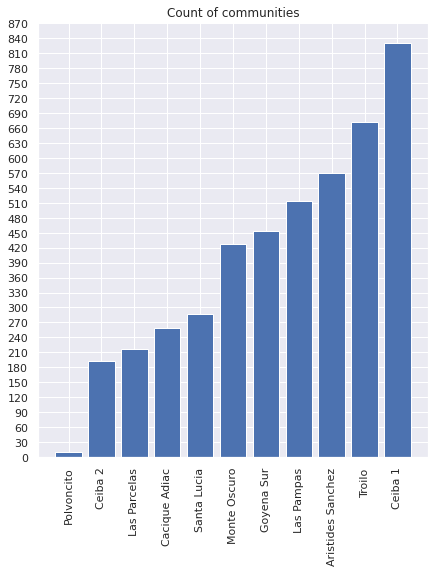

In [3]:
# count of farms in different communities

community_count = combined_data.groupby("Community").size().sort_values()
all_communities = community_count.index
region_count = combined_data.groupby("Region").size().sort_values()

plt.figure(figsize=(7,8))
plt.title("Count of communities")
plt.bar(community_count.index, community_count.values)
plt.xticks(rotation=90);
plt.yticks(np.arange(900, step=30));




In [4]:
def count_produce(produce):
    # grouping by family visited to get a list of what fruit each family cultiates
    def num(s):
        return list(np.unique(s.values))
    if produce == "Grasses":
        combined_data[produce] = combined_data[produce].replace(0, "None").values
    else: 
        combined_data[produce] = combined_data[produce].replace(0, None).values
    produce_df = combined_data.loc[:,["Family visited", produce]].groupby("Family visited").agg(num)

    # find out how many families own a certain type of fruit
    all_items = np.unique(combined_data[produce])
    produce_num = []
    for i in all_items:
        produce_num.append(np.sum(produce_df[produce].apply(lambda x: i in x)))

    # graphing 
    produce_cnt = pd.DataFrame({produce: all_items,"Num": produce_num}).sort_values(by="Num")
    plt.figure(figsize=(10,5))
    plt.title("Number of households with each " + produce)
    plt.bar(produce_cnt[produce].values, produce_cnt["Num"].values)
    plt.yticks(np.arange(0, 50, step=5))
    plt.xticks(rotation=90);

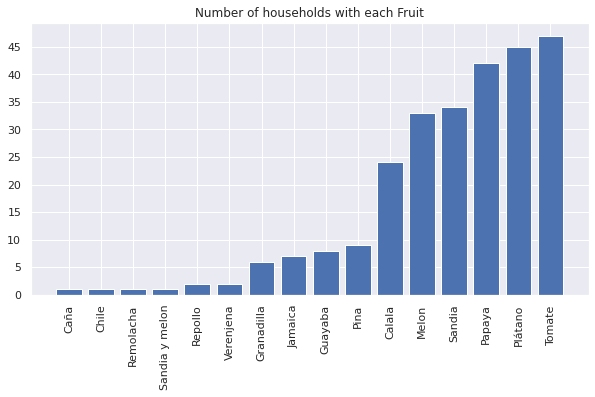

In [5]:
count_produce("Fruit")